In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [7]:
columns=["TV","Radio","Newspaper"]
X=data[columns].values.reshape(-1,3)
y=data["Sales"].values.reshape(-1,1)
print(y.shape)
X = np.column_stack((X[:, 0] * X[:, 1], X[:, 0] * X[:, 2], X[:, 1] * X[:, 2], X[:, 0] ** 2, X[:, 1] ** 2, X[:, 2] ** 2, X))
print(X.shape)

(200, 1)
(200, 9)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

[[8.93200e+02 2.67960e+03 1.77870e+02 ... 1.16000e+02 7.70000e+00
  2.31000e+01]
 [1.64610e+03 1.13280e+03 5.95200e+01 ... 1.77000e+02 9.30000e+00
  6.40000e+00]
 [1.15077e+03 1.51281e+03 9.37170e+02 ... 4.31000e+01 2.67000e+01
  3.51000e+01]
 ...
 [7.29295e+03 1.28443e+04 1.97650e+03 ... 2.17700e+02 3.35000e+01
  5.90000e+01]
 [1.65600e+03 2.91456e+03 1.76000e+02 ... 1.65600e+02 1.00000e+01
  1.76000e+01]
 [2.83002e+03 5.99628e+03 2.16140e+02 ... 2.80200e+02 1.01000e+01
  2.14000e+01]]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
means = scaler.mean_
scales = np.sqrt(scaler.var_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = (X_test - means)/scales
print(X_test_scaled)

[[ 5.01838751e-01  8.80626951e-01  9.76876694e-01 -1.14868405e-01
   3.53971232e-01  9.42058287e-01  1.57812165e-01  5.91127268e-01
   1.13227461e+00]
 [ 1.75835198e+00  1.24415002e+00  1.93264278e+00  3.37942156e-01
   2.10942255e+00  9.42058287e-01  5.39252835e-01  1.68199613e+00
   1.13227461e+00]
 [ 1.44681051e+00  1.74008652e+00  4.72919345e-01  2.21022509e+00
   8.21831001e-02  3.52960294e-01  1.69783431e+00  3.67533029e-01
   6.53800957e-01]
 [-9.26299991e-01 -8.55484765e-01  9.72657224e-01 -1.15818806e+00
   8.53150073e-01  4.64691550e-01 -1.64363349e+00  9.50233166e-01
   7.52455319e-01]
 [ 2.20357258e+00 -8.17781414e-01 -7.23075988e-01  7.45003170e-01
   2.28226864e+00 -8.19965110e-01  8.35136719e-01  1.77007871e+00
  -1.31928629e+00]
 [-2.62821262e-01 -1.21427584e-01  1.17086010e+00 -9.41772181e-01
   6.65316933e-01  9.28711204e-01 -8.90258461e-01  8.21497089e-01
   1.12240918e+00]
 [ 1.81783271e+00  2.93709601e-01  4.40959103e-01  6.84840239e-01
   1.63082685e+00 -3.5888408

In [10]:
ones_column = np.ones((X_train_scaled.shape[0], 1))
ones_column2 = np.ones((X_test_scaled.shape[0], 1))
X_train_scaled = np.hstack((X_train_scaled, ones_column))
X_test_scaled = np.hstack((X_test_scaled, ones_column2))
print(X_test_scaled)

[[ 5.01838751e-01  8.80626951e-01  9.76876694e-01 -1.14868405e-01
   3.53971232e-01  9.42058287e-01  1.57812165e-01  5.91127268e-01
   1.13227461e+00  1.00000000e+00]
 [ 1.75835198e+00  1.24415002e+00  1.93264278e+00  3.37942156e-01
   2.10942255e+00  9.42058287e-01  5.39252835e-01  1.68199613e+00
   1.13227461e+00  1.00000000e+00]
 [ 1.44681051e+00  1.74008652e+00  4.72919345e-01  2.21022509e+00
   8.21831001e-02  3.52960294e-01  1.69783431e+00  3.67533029e-01
   6.53800957e-01  1.00000000e+00]
 [-9.26299991e-01 -8.55484765e-01  9.72657224e-01 -1.15818806e+00
   8.53150073e-01  4.64691550e-01 -1.64363349e+00  9.50233166e-01
   7.52455319e-01  1.00000000e+00]
 [ 2.20357258e+00 -8.17781414e-01 -7.23075988e-01  7.45003170e-01
   2.28226864e+00 -8.19965110e-01  8.35136719e-01  1.77007871e+00
  -1.31928629e+00  1.00000000e+00]
 [-2.62821262e-01 -1.21427584e-01  1.17086010e+00 -9.41772181e-01
   6.65316933e-01  9.28711204e-01 -8.90258461e-01  8.21497089e-01
   1.12240918e+00  1.00000000e+00

In [11]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(10,1)
print('Theta:',theta)

Theta: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


In [12]:
def model(X, theta):
    return X.dot(theta)

In [13]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [14]:
cost_function(X_train_scaled, y_train, theta)

114.6856799956796

In [15]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [16]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [29]:
n_iterations = 200
learning_rate = 0.41

theta_final, cost_history = gradient_descent(X_train_scaled, y_train, theta, learning_rate, n_iterations)

In [30]:
cost_history[-1]

0.9604825451385088

In [34]:
predictions = model(X_train_scaled, theta_final)
predictions

array([[12.67035115],
       [15.6694328 ],
       [ 9.17590678],
       [ 9.70175071],
       [16.90565243],
       [ 7.97156927],
       [10.46536011],
       [15.53281689],
       [11.99562969],
       [11.48048603],
       [13.84720791],
       [15.15080168],
       [ 8.79195674],
       [ 7.43712046],
       [10.29380761],
       [13.27377106],
       [10.58600853],
       [25.09868661],
       [ 6.97410599],
       [16.0874297 ],
       [19.42581589],
       [17.13015608],
       [13.11599384],
       [ 8.55895955],
       [18.81547923],
       [ 6.85832545],
       [22.19528002],
       [ 6.73040389],
       [13.45702833],
       [ 8.56529303],
       [11.85846088],
       [10.49721464],
       [16.98581758],
       [18.38387388],
       [16.15261847],
       [18.14596241],
       [15.83605274],
       [20.21844552],
       [16.97808672],
       [22.17148405],
       [ 9.12587338],
       [14.42843434],
       [11.33135542],
       [18.35058322],
       [10.43437216],
       [17

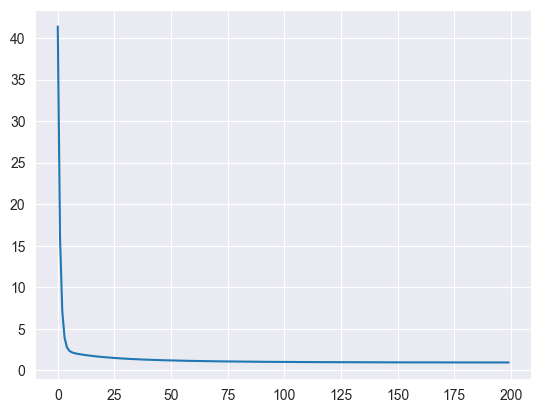

In [31]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [32]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [35]:
print("Coeff de determination pour train : ", coef_determination(y_train, predictions)*100 ,"%")
predictions = model(X_test_scaled, theta_final)
print("Coeff de determination pour test :",coef_determination(y_test, predictions)*100,"%")

Coeff de determination pour train :  92.83205254496863 %
Coeff de determination pour test : 95.2042287218117 %
